## Reto 3: Tablas de contingencia

### 1. Objetivos:
    - Aprender a generar tablas de contingencia utilizando múltiples variables categóricas.
 
---
    
### 2. Desarrollo:

En este Reto vamos a volver a utilizar el dataset 'melbourne_housing-clean.csv'. Nuestro objetivo será segmentar nuestros datos usando 2 o 3 variables categóricas y luego realizar algunas visualizaciones. Elige el Reto a) o b) y sigue las instrucciones.

### a) Segmentando por tipo y número de cuartos

La primera parte consiste en lo siguiente:

1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.
2. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.
3. Agrega los títulos y anotaciones necesarias.
4. Describe las similitudes y las diferencias de las distribuciones de las 3 gráficas.

In [16]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_melbourne_housing = pd.read_csv("https://github.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/raw/student/Datasets/melbourne_housing-clean.csv", index_col=0)

### b) Segmentando por región, tipo y número de cuartos

Ahora vamos a hacer una triple segmentación. Realiza los siguientes pasos:

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
2. Usa el método `stack` para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
3. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada `Serie` usando una tupla para indicar los valores de los dos niveles del índice.
4. Anota tus gráficas adecuadamente.
5. Describe las similitudes y diferencias entre las 4 gráficas.

In [25]:
# Tu código va aquí
#
# ...
# ...

In [7]:
type_rooms = pd.crosstab(df_melbourne_housing['type'], df_melbourne_housing['rooms'])
type_rooms

rooms,1,2,3,4,5,6,7,8
type,,,,,,,,
h,54,1261,3912,1991,475,54,9,6
t,9,299,575,138,4,0,0,0
u,582,1829,429,17,0,1,0,1


<AxesSubplot:xlabel='rooms'>

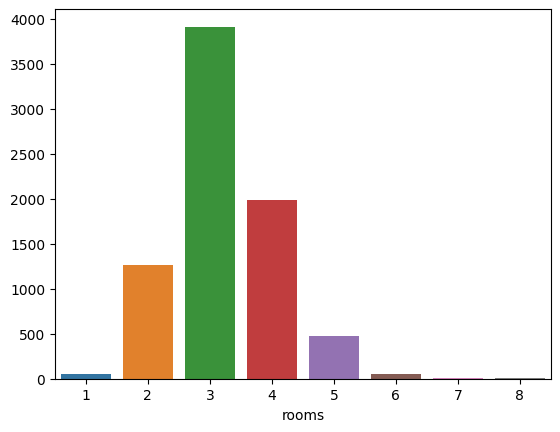

In [15]:
h_data = type_rooms.loc['h']
sns.barplot(x=h_data.index, y=h_data.values)

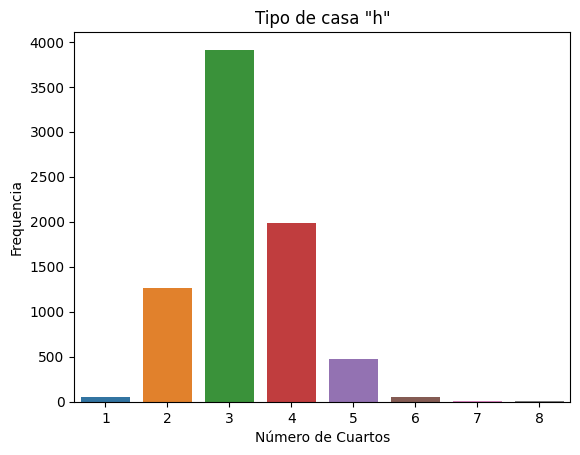

<Figure size 1000x600 with 0 Axes>

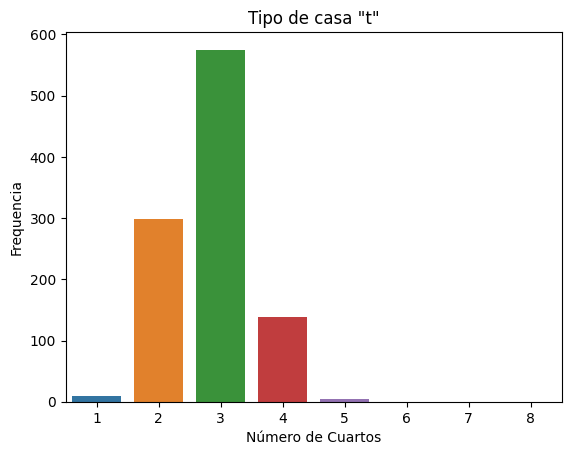

<Figure size 1000x600 with 0 Axes>

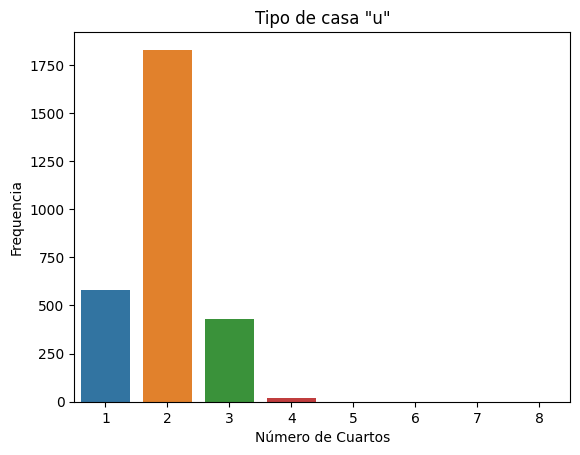

<Figure size 1000x600 with 0 Axes>

In [27]:
unique_types = type_rooms.index

for type_to_plot in unique_types:

    data = type_rooms.loc[type_to_plot]
    
    sns.barplot(x=data.index, y=data.values)
    plt.title(f'Tipo de casa "{type_to_plot}"')
    plt.xlabel('Número de Cuartos')
    plt.ylabel('Frequencia')
    plt.figure(figsize=(10, 6))  
    plt.tight_layout()
    plt.show()

In [20]:
regionname_type_rooms = pd.crosstab(df_melbourne_housing['region_name'], 
                                    [df_melbourne_housing['type'],
                                      df_melbourne_housing['rooms']])
regionname_type_rooms

type                         h                                 t            \
rooms                        1    2     3    4    5   6  7  8  1    2    3   
region_name                                                                  
Eastern Metropolitan         4   83   396  292   77   8  1  2  0   23   60   
Eastern Victoria             0    2    13   17    1   0  0  0  0    0    0   
Northern Metropolitan       23  539  1237  449   76   6  2  0  6  134  139   
Northern Victoria            0    2    12    5    1   1  0  0  0    0    0   
South-Eastern Metropolitan   0    8   123   74   14   5  0  0  0    3   13   
Southern Metropolitan       14  366  1028  704  217  23  5  3  3   72  233   
Western Metropolitan        13  260  1090  443   89  11  1  1  0   67  130   
Western Victoria             0    1    13    7    0   0  0  0  0    0    0   

type                                 u                     
rooms                        4  5    1    2    3  4  6  8  
region_name                                                
Eastern Metropolitan        18  1    9   97   48  5  0  0  
Eastern Victoria             0  0    0    2    1  0  0  0  
Northern Metropolitan       10  1  196  499   98  2  0  1  
Northern Victoria            1  0    0    0    0  0  0  0  
South-Eastern Metropolitan   4  0    2   19    7  0  0  0  
Southern Metropolitan       78  0  311  968  192  7  0  0  
Western Metropolitan        27  2   64  243   83  3  1  0  
Western Victoria             0  0    0    1    0  0  0  0

In [22]:
regionname_type_rooms_stacked = regionname_type_rooms.stack(level=0)
regionname_type_rooms_stacked

rooms                              1    2     3    4      5     6    7    8
region_name                type                                            
Eastern Metropolitan       h       4   83   396  292   77.0   8.0  1.0  2.0
                           t       0   23    60   18    1.0   NaN  NaN  NaN
                           u       9   97    48    5    NaN   0.0  NaN  0.0
Eastern Victoria           h       0    2    13   17    1.0   0.0  0.0  0.0
                           t       0    0     0    0    0.0   NaN  NaN  NaN
                           u       0    2     1    0    NaN   0.0  NaN  0.0
Northern Metropolitan      h      23  539  1237  449   76.0   6.0  2.0  0.0
                           t       6  134   139   10    1.0   NaN  NaN  NaN
                           u     196  499    98    2    NaN   0.0  NaN  1.0
Northern Victoria          h       0    2    12    5    1.0   1.0  0.0  0.0
                           t       0    0     0    1    0.0   NaN  NaN  NaN
                           u       0    0     0    0    NaN   0.0  NaN  0.0
South-Eastern Metropolitan h       0    8   123   74   14.0   5.0  0.0  0.0
                           t       0    3    13    4    0.0   NaN  NaN  NaN
                           u       2   19     7    0    NaN   0.0  NaN  0.0
Southern Metropolitan      h      14  366  1028  704  217.0  23.0  5.0  3.0
                           t       3   72   233   78    0.0   NaN  NaN  NaN
                           u     311  968   192    7    NaN   0.0  NaN  0.0
Western Metropolitan       h      13  260  1090  443   89.0  11.0  1.0  1.0
                           t       0   67   130   27    2.0   NaN  NaN  NaN
                           u      64  243    83    3    NaN   1.0  NaN  0.0
Western Victoria           h       0    1    13    7    0.0   0.0  0.0  0.0
                           t       0    0     0    0    0.0   NaN  NaN  NaN
                           u       0    1     0    0    NaN   0.0  NaN  0.0

Estamos apilando el nivel de columnas 'rooms' (nivel 0) en el índice, lo que nos permite trabajar de manera más eficiente con los datos de conteo para diferentes combinaciones de 'type' y 'rooms', lo cual facilita la creación de visualizaciones como gráficos de barras para cada 'region_name' y 'type'.

In [23]:
regionname_type_rooms_stacked.index.levels[0].tolist()

['Eastern Metropolitan',
 'Eastern Victoria',
 'Northern Metropolitan',
 'Northern Victoria',
 'South-Eastern Metropolitan',
 'Southern Metropolitan',
 'Western Metropolitan',
 'Western Victoria']

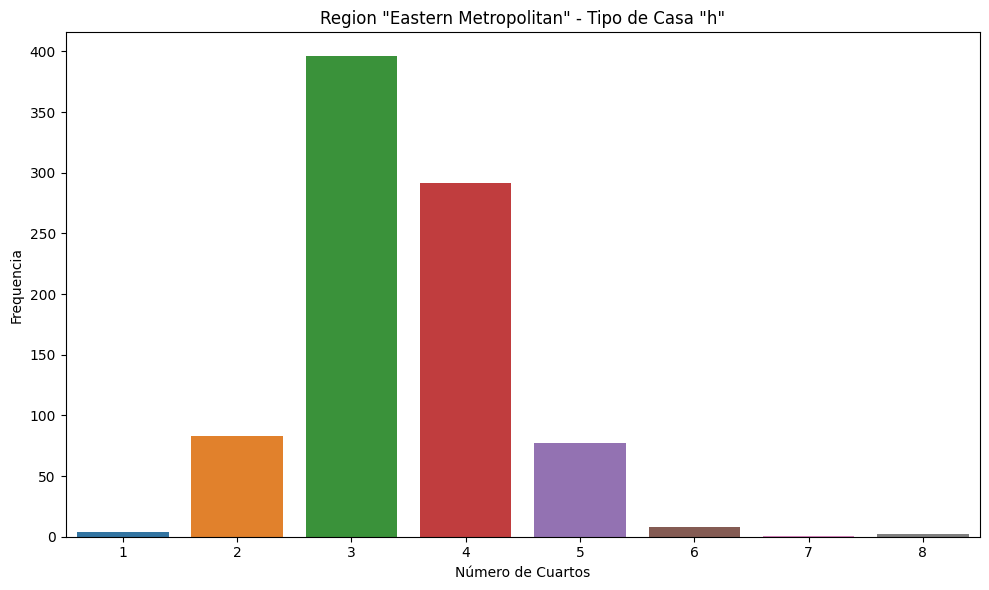

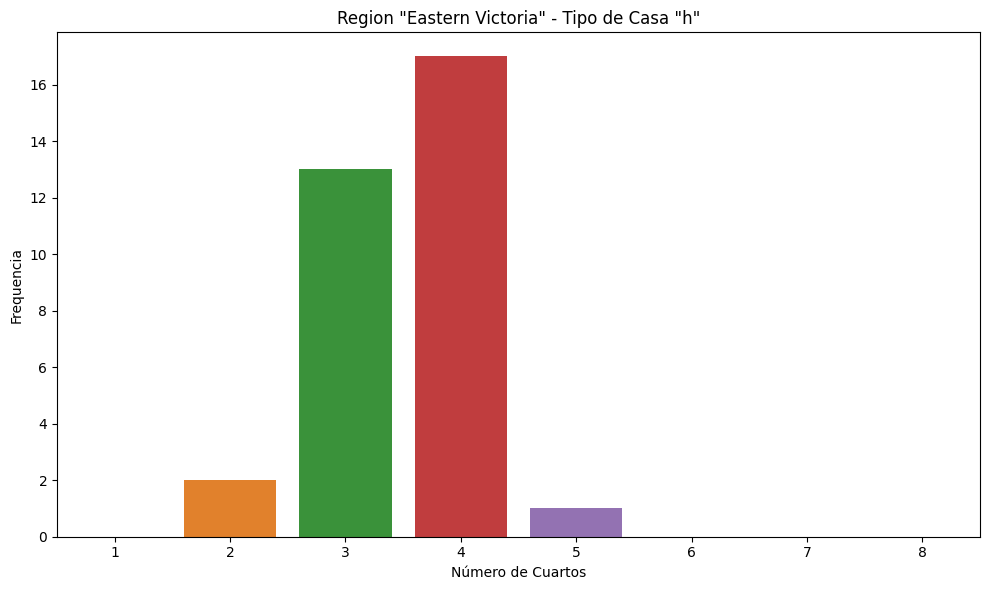

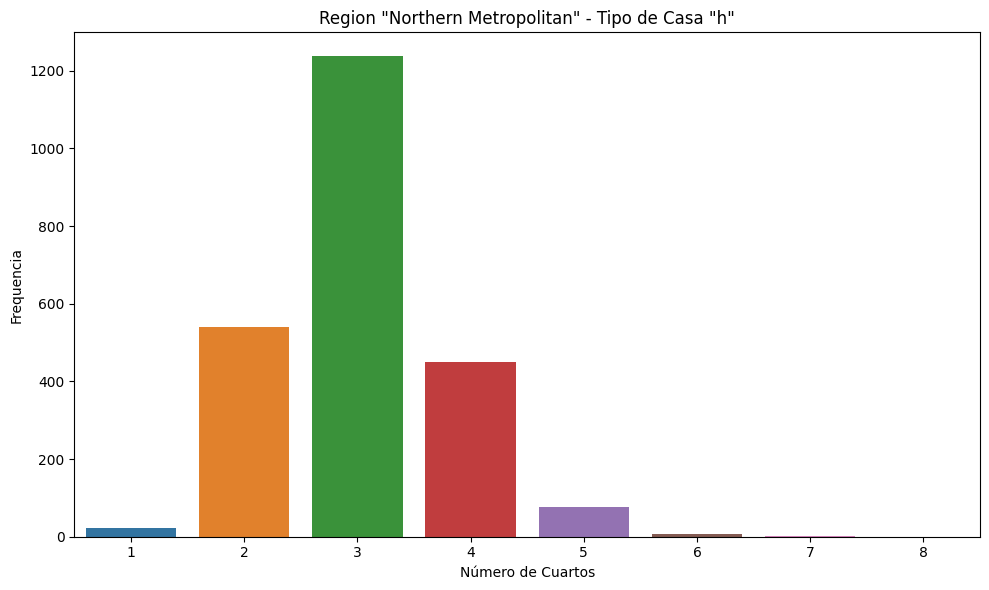

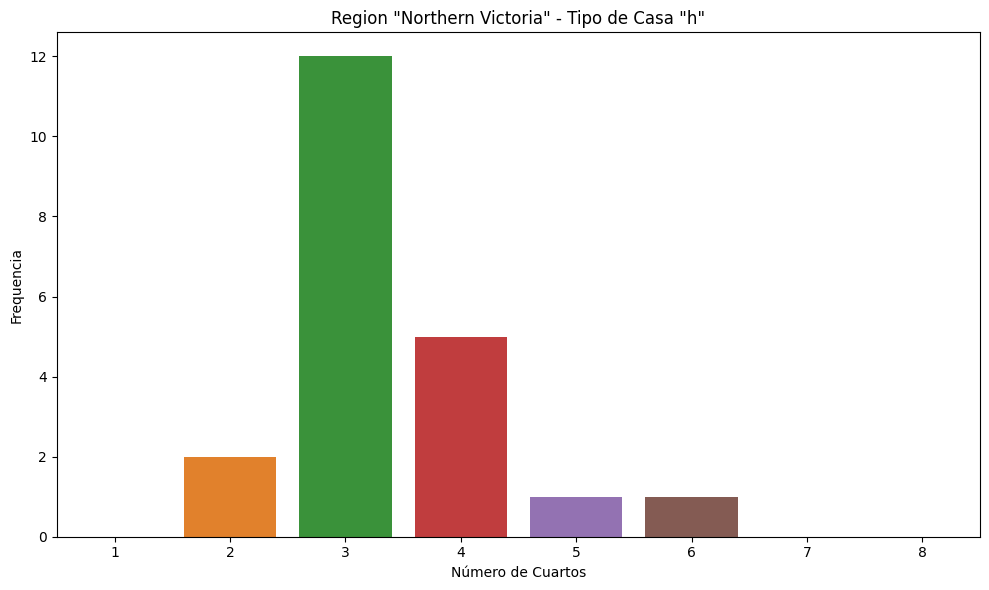

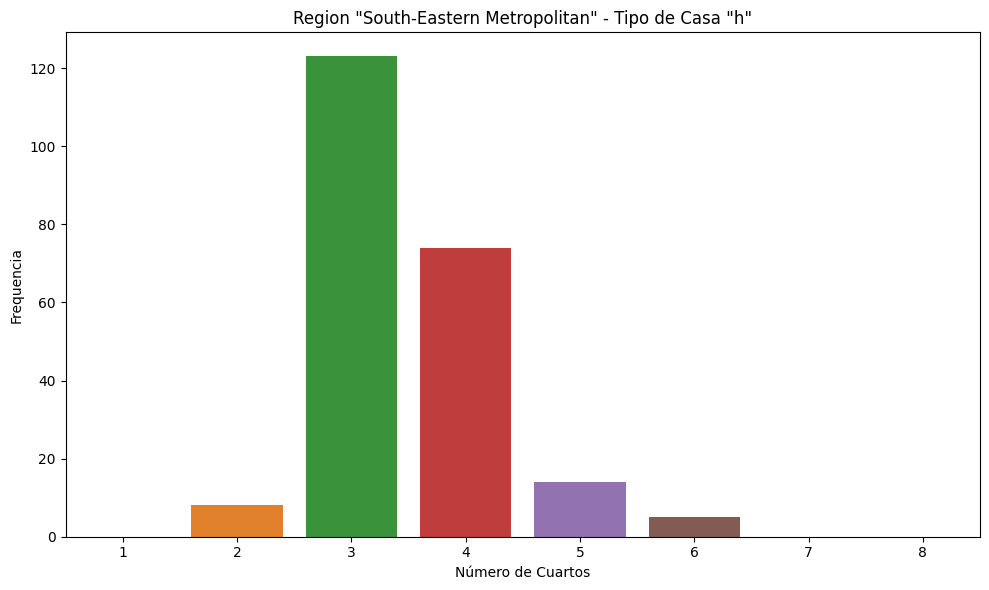

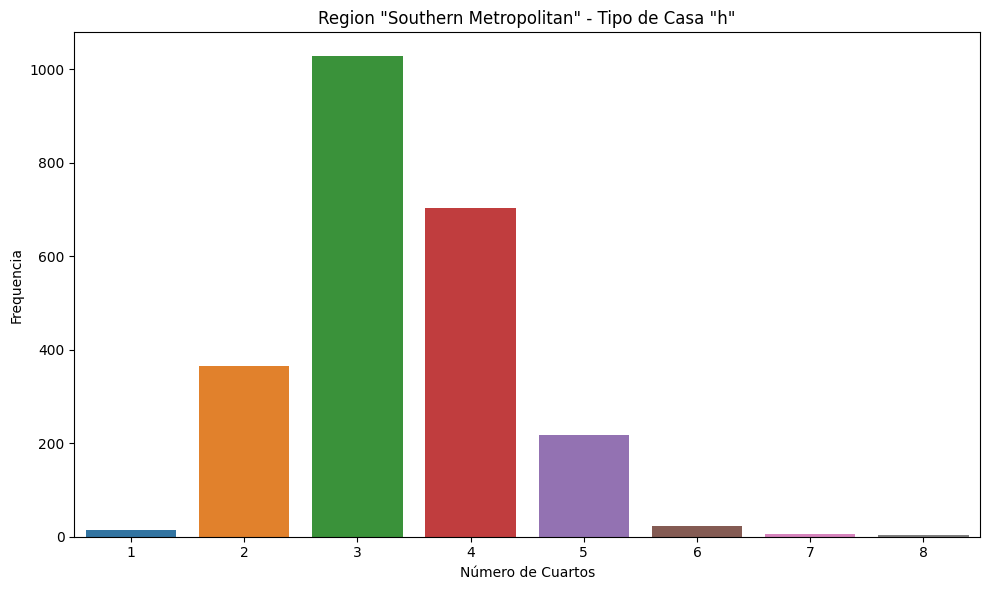

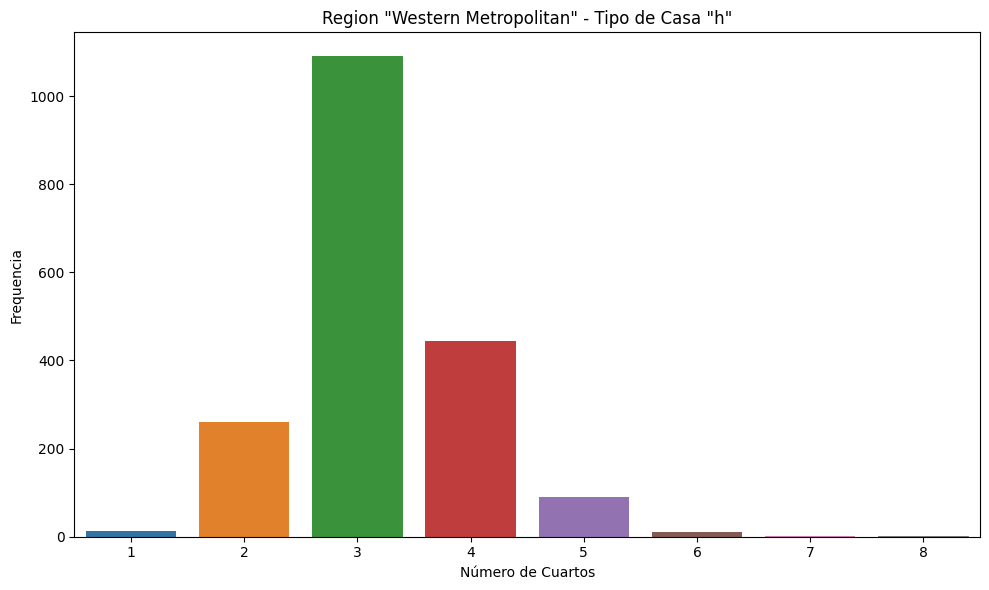

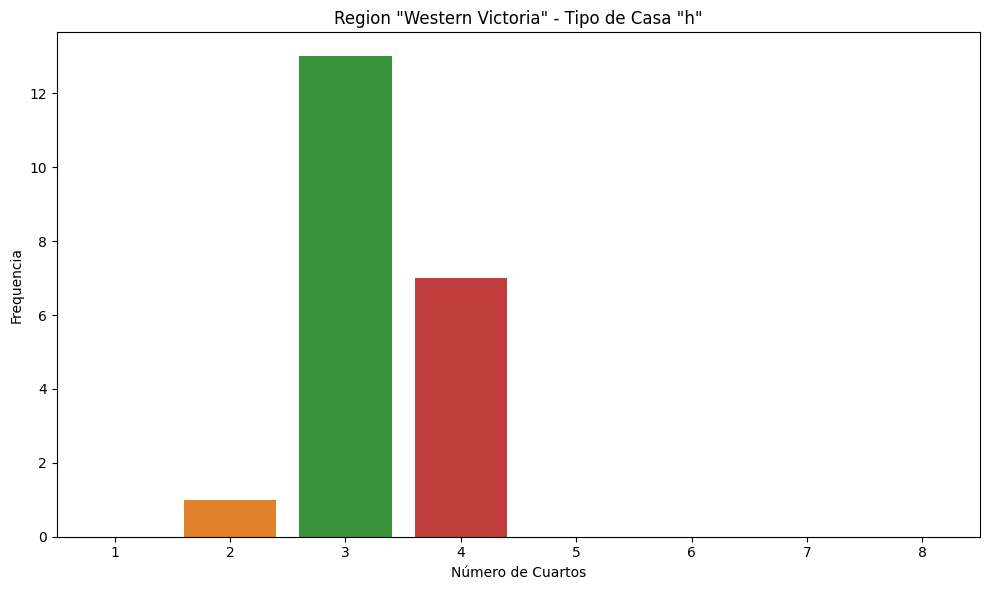

In [28]:
region_names = regionname_type_rooms_stacked.index.levels[0].tolist()
types_to_plot = ['h']

for region_name in region_names:
    plt.figure(figsize=(10, 6)) 
    data = regionname_type_rooms_stacked.loc[(region_name, types_to_plot[0])]

    sns.barplot(x=data.index, y=data.values)
    plt.title(f'Region "{region_name}" - Tipo de Casa "{types_to_plot[0]}"')
    plt.xlabel('Número de Cuartos')
    plt.ylabel('Frequencia')

    plt.tight_layout()
    plt.show()